In [22]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [23]:
# Correct function to read an Excel file
df = pd.read_excel('Advertised NTG Jobs - Mar 2019 to Feb 2021.xlsx')

# Display the DataFrame
df.head()

,id,PositionTitle,Designation,Salary,Agency,Locations,VacancyType,Vacancy6MonthsOrLess,EmploymentCategory,NumberOfVacancies,NumberOfVacancies Several,NumberOfApplicants,NumberOfSuccessfulApplicants
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,"Department of Industry, Tourism and Trade",Katherine,Fixed (Temporary) - Part Time,NaN,"Administration and Business Services, Agricult...",1.0,NaN,3,0
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Trade Business and Innovation,Darwin,Fixed (Temporary) - Full Time,YES,Administration and Business Services,1.0,NaN,18,0
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Corporate and Digital Development,Darwin,Fixed (Temporary) - Full Time,NaN,"Administration and Business Services, Program ...",1.0,NaN,6,1
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Department of Health,Darwin,Ongoing (Permanent) - Full Time,NaN,Allied Health and Health Care Services,1.0,NaN,10,1
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,Department of Health,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,NaN,"Professional, Nursing and Midwifery, Allied He...",NaN,Several,17,3


### Feature Engineering

#### New column: Remoteness

This feature indicates the remoteness of the work locations.

In [24]:
def map_to_remoteness(location):
    if any(place in location for place in [
        'Darwin', 'Palmerston', 'Acacia Hills', 'Berry Springs', 'Humpty Doo', 'Litchfield', 'Sydney']):
        return 'Outer Regional'
    elif any(place in location for place in [
        'Katherine', 'Nhulunbuy', 'Jabiru', 'Tennant Creek', 'Yulara', 'Maningrida', 'Wadeye', 'Port Keats',
        'Wurrumiyanga', 'Nguiu', 'Gunbalanya', 'Oenpelli', 'Kalkarindji', 'Wave Hill', 'Lajamanu', 'Pine Creek', 
        'Adelaide River', 'Douglas Daly', 'Winnellie', 'Middle Point', 'Batchelor', 'Tipperary Station',
        'Wildman River', 'Nathan River', 'Kidman Springs', 'Urapunga', 'Dundee Beach']):
        return 'Remote'
    elif any(place in location for place in [
        'Elcho Island', 'Galiwinku', 'Ramingining', 'Numbulwar', 'Gapuwiyak', 'Milingimbi', 'Milyakburra',
        'Umbakumba', 'Angurugu', 'Gunyangara', 'Timber Creek', 'Borroloola', 'Beswick', 'Bulman', 'Minyerri',
        'Ngukurr', 'Robinson River', 'Elliott', 'Ali Curung', 'Alpurrululam', 'Canteen Creek', 'Ampilatwatja', 
        'Arlparra', 'Wutungurra', 'Hermannsburg', 'Ntaria', 'Papunya', 'Ti Tree', 'Atitjere', 'Haasts Bluff',
        'Laramba', 'Mount Liebig', 'Willowra', 'Wilora', 'Yuendumu', 'Yuelamu', 'Areyonga', 'Engawala', 'Finke',
        'Imanpa', 'Kaltukatjara', 'Docker River', 'Kintore', 'Nturiya', 'Tara', 'Peppimenarti', 'Pirlangimpi',
        'Melville Island', 'Nauiyu', 'Daly River', 'Minjilang', 'Croker Island', 'Milikapiti', 'Snake Bay',
        'Warruwi', 'South Goulburn Island', 'Yarralin', 'Amanbidji', 'Kildurk', 'Pigeon Hole', 'Bulla', 'Manyallaluk',
        'Jilkminggan', 'Barunga', 'Binjari', 'Alice Springs', 'Keep River', 'Rockhampton Downs', 'Murray Downs-Imangara',
        'Epenarra-Wutunurrgur', 'Ammaroo', 'Brunette Downs-Ngunarr', 'Trephina Gorge', 'Wallace Rockhole',
        'Watarrka', 'Nyirrpi-Waite Creek', 'Ormiston Gorge', 'Kings Canyon', 'Maryvale (Titjikala)', 'Mt Liebig-Amunturrng',
        'Mulga Bore', 'Bonya (Baikal/Bonja)', 'Bullita', 'Coburg-Thundr Rk/Gum', 'Mamaruni', 
        'Djembrie-Duck Ck/Jil', 'Docker Rvr-Kaltukarj', 'Mutitjulu (Ayers Rock)']):
        return 'Very Remote'
    else:
        return 'Very Remote'

# Apply the mapping function to create a new 'Remoteness' column
df['Remoteness'] = df['Locations'].apply(map_to_remoteness)

# Display the first few rows of the categorized DataFrame
df.head()

,id,PositionTitle,Designation,Salary,Agency,Locations,VacancyType,Vacancy6MonthsOrLess,EmploymentCategory,NumberOfVacancies,NumberOfVacancies Several,NumberOfApplicants,NumberOfSuccessfulApplicants,Remoteness
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,"Department of Industry, Tourism and Trade",Katherine,Fixed (Temporary) - Part Time,NaN,"Administration and Business Services, Agricult...",1.0,NaN,3,0,Remote
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Trade Business and Innovation,Darwin,Fixed (Temporary) - Full Time,YES,Administration and Business Services,1.0,NaN,18,0,Outer Regional
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Corporate and Digital Development,Darwin,Fixed (Temporary) - Full Time,NaN,"Administration and Business Services, Program ...",1.0,NaN,6,1,Outer Regional
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Department of Health,Darwin,Ongoing (Permanent) - Full Time,NaN,Allied Health and Health Care Services,1.0,NaN,10,1,Outer Regional
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,Department of Health,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,NaN,"Professional, Nursing and Midwifery, Allied He...",NaN,Several,17,3,Very Remote


In [25]:
df['Remoteness'].value_counts()

Remoteness
Outer Regional    5818
Very Remote       2060
Remote            1341
Name: count, dtype: int64

In [26]:
# Function to map locations to regions
def map_to_region(location):
    if any(place in location for place in [
        'Darwin', 'Palmerston', 'Acacia Hills', 'Berry Springs', 'Humpty Doo', 'Litchfield', 'Jabiru', 'Belyuen',
        'Winnellie', 'Middle Point', 'Batchelor', 'Douglas Daly', 'Adelaide River', 'Dundee Beach', 'Sydney']):
        return 'Darwin Region'
    elif any(place in location for place in [
        'Nhulunbuy', 'Yirrkala', 'Elcho Island', 'Galiwinku', 'Ramingining', 'Numbulwar', 'Gapuwiyak', 'Milingimbi',
        'Milyakburra', 'Umbakumba', 'Angurugu', 'Gunyangara', 'Lake Evella', 'Alyangula', 'Baniyala (Yilpara)']):
        return 'East Arnhem Region'
    elif any(place in location for place in [
        'Katherine', 'Mataranka', 'Timber Creek', 'Borroloola', 'Larrimah', 'Daly Waters', 'Pine Creek', 'Beswick',
        'Bulman', 'Minyerri', 'Ngukurr', 'Robinson River', 'Urapunga', 'Nathan River', 'Kidman Springs']):
        return 'Big Rivers Region'
    elif any(place in location for place in [
        'Tennant Creek', 'Elliott', 'Ali Curung', 'Alpurrurulam', 'Canteen Creek', 'Ampilatwatja', 'Arlparra',
        'Wutungurra', 'Rockhampton Downs', 'Murray Downs-Imangara', 'Epenarra-Wutunurrgur', 'Ammaroo',
        'Brunette Downs-Ngunarr', 'Lk Nash-Alpurrurulam']):
        return 'Barkly Region'
    elif any(place in location for place in [
        'Alice Springs', 'Yulara', 'Hermannsburg', 'Ntaria', 'Papunya', 'Ti Tree', 'Atitjere', 'Haasts Bluff',
        'Laramba', 'Mount Liebig', 'Willowra', 'Wilora', 'Yuendumu', 'Yuelamu', 'Ampilatwatja', 'Areyonga', 'Engawala',
        'Finke', 'Imanpa', 'Kaltukatjara', 'Docker River', 'Kintore', 'Nturiya', 'Tara', 'Trephina Gorge',
        'Wallace Rockhole', 'Watarrka', 'Nyirrpi-Waite Creek', 'Ormiston Gorge', 'Kings Canyon', 'Maryvale (Titjikala)',
        'Mt Liebig-Amunturrng', 'Mulga Bore', 'Bonya (Baikal/Bonja)', 'Djembrie-Duck Ck/Jil', 'Docker Rvr-Kaltukarj', 
        'Mutitjulu (Ayers Rock)']):
        return 'Central Region'
    elif any(place in location for place in [
        'Maningrida', 'Wadeye', 'Port Keats', 'Wurrumiyanga', 'Nguiu', 'Peppimenarti', 'Pirlangimpi', 'Melville Island',
        'Nauiyu', 'Daly River', 'Gunbalanya', 'Oenpelli', 'Minjilang', 'Croker Island', 'Milikapiti', 'Snake Bay',
        'Warruwi', 'South Goulburn Island', 'Yarralin', 'Amanbidji', 'Kildurk', 'Kalkarindji', 'Wave Hill', 'Daguragu',
        'Lajamanu', 'Pigeon Hole', 'Bulla', 'Manyallaluk', 'Jilkminggan', 'Barunga', 'Binjari', 'Tipperary Station',
        'Wildman River', 'Nganambala', 'Palumpa-Nganmarriyan', 'Pularumpi-Pirlangimpi', 'Bullita', 'Coburg-Thundr Rk/Gum',
        'Mamaruni', 'Keep River']):
        return 'Top End Region'
    else:
        return 'Barkly Region'

# Apply the mapping functions to create a new 'Region' column
df['Region'] = df['Locations'].apply(map_to_region)

# Display the DataFrame with the new 'Region' column
df

,id,PositionTitle,Designation,Salary,Agency,Locations,VacancyType,Vacancy6MonthsOrLess,EmploymentCategory,NumberOfVacancies,NumberOfVacancies Several,NumberOfApplicants,NumberOfSuccessfulApplicants,Remoteness,Region
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,"Department of Industry, Tourism and Trade",Katherine,Fixed (Temporary) - Part Time,NaN,"Administration and Business Services, Agricult...",1.0,NaN,3,0,Remote,Big Rivers Region
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Trade Business and Innovation,Darwin,Fixed (Temporary) - Full Time,YES,Administration and Business Services,1.0,NaN,18,0,Outer Regional,Darwin Region
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Corporate and Digital Development,Darwin,Fixed (Temporary) - Full Time,NaN,"Administration and Business Services, Program ...",1.0,NaN,6,1,Outer Regional,Darwin Region
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Department of Health,Darwin,Ongoing (Permanent) - Full Time,NaN,Allied Health and Health Care Services,1.0,NaN,10,1,Outer Regional,Darwin Region
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,Department of Health,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,NaN,"Professional, Nursing and Midwifery, Allied He...",NaN,Several,17,3,Very Remote,Barkly Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,210050,Nurse/Midwife Clinical Specialist: Remote Area...,NURSE LEVEL 4,122287,Department of Health,Borroloola,Fixed (Temporary) - Full Time,YES,"Nursing and Midwifery, Allied Health and Healt...",1.0,NaN,0,0,Very Remote,Big Rivers Region
9215,210054,Nurse/Midwife Clinical Specialist Primary Heal...,NURSE LEVEL 4 RDO,122287,Department of Health,Borroloola,Fixed (Temporary) - Full Time,YES,"Nursing and Midwifery, Allied Health and Healt...",1.0,NaN,0,0,Very Remote,Big Rivers Region
9216,210056,Nurse/Midwife Clinical Specialist - Child and ...,NURSE LEVEL 4,122287,Department of Health,Borroloola,Fixed (Temporary) - Full Time,YES,"Nursing and Midwifery, Medical",1.0,NaN,0,0,Very Remote,Big Rivers Region
9217,210076,Registered Nurse/Midwife,NURSE LEVEL 2,90082,Department of Health,Alice Springs,Ongoing (Permanent) - Full Time,NaN,"Nursing and Midwifery, Allied Health and Healt...",NaN,Several,0,0,Very Remote,Central Region


#### New column: Flexibility

This feature determines whether a job has the flexibility of switching work locations or not based on the number of locations available.

In [27]:
# Function to determine 'Flexibility'
def determine_flexibility(location):
    if ',' in location:
        return 'Yes'
    else:
        return 'No'

# Apply the function to create the 'Flexibility' column
df['Flexibility'] = df['Locations'].apply(determine_flexibility)


df.head()

,id,PositionTitle,Designation,Salary,Agency,Locations,VacancyType,Vacancy6MonthsOrLess,EmploymentCategory,NumberOfVacancies,NumberOfVacancies Several,NumberOfApplicants,NumberOfSuccessfulApplicants,Remoteness,Region,Flexibility
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,"Department of Industry, Tourism and Trade",Katherine,Fixed (Temporary) - Part Time,NaN,"Administration and Business Services, Agricult...",1.0,NaN,3,0,Remote,Big Rivers Region,No
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Trade Business and Innovation,Darwin,Fixed (Temporary) - Full Time,YES,Administration and Business Services,1.0,NaN,18,0,Outer Regional,Darwin Region,No
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Corporate and Digital Development,Darwin,Fixed (Temporary) - Full Time,NaN,"Administration and Business Services, Program ...",1.0,NaN,6,1,Outer Regional,Darwin Region,No
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Department of Health,Darwin,Ongoing (Permanent) - Full Time,NaN,Allied Health and Health Care Services,1.0,NaN,10,1,Outer Regional,Darwin Region,No
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,Department of Health,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,NaN,"Professional, Nursing and Midwifery, Allied He...",NaN,Several,17,3,Very Remote,Barkly Region,Yes


### Check the dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9219 non-null   int64  
 1   PositionTitle                 9219 non-null   object 
 2   Designation                   9219 non-null   object 
 3   Salary                        9219 non-null   int64  
 4   Agency                        9219 non-null   object 
 5   Locations                     9219 non-null   object 
 6   VacancyType                   9219 non-null   object 
 7   Vacancy6MonthsOrLess          1372 non-null   object 
 8   EmploymentCategory            9219 non-null   object 
 9   NumberOfVacancies             8692 non-null   float64
 10  NumberOfVacancies Several     527 non-null    object 
 11  NumberOfApplicants            9219 non-null   int64  
 12  NumberOfSuccessfulApplicants  9219 non-null   int64  
 13  Rem

#### Column 'NumberOfVacancies'

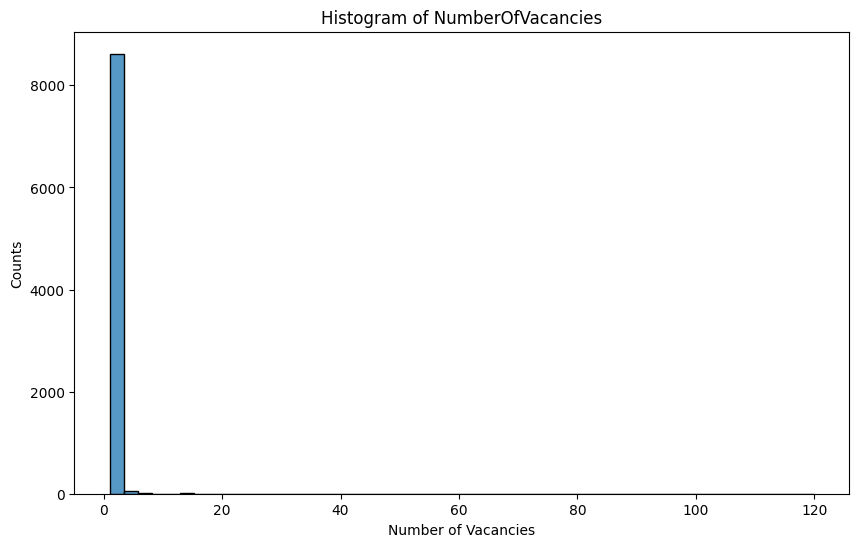

In [29]:
# Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['NumberOfVacancies'], bins=50)
plt.title('Histogram of NumberOfVacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('Counts')
plt.show()

In [30]:
df['NumberOfVacancies'].value_counts()

NumberOfVacancies
1.0      8238
2.0       322
3.0        60
5.0        23
4.0        23
6.0         7
7.0         4
8.0         4
13.0        3
10.0        3
24.0        1
9.0         1
15.0        1
120.0       1
14.0        1
Name: count, dtype: int64

The majority of data is 1. It means most of the job postings only hire one position. 

#### Column: NumberOfVacancies

This feature indicates the number of vacancies.

In [31]:
# Calculate the average difference
df_non_nan = df.dropna(subset=['NumberOfVacancies'])
average_diff = (df_non_nan['NumberOfVacancies'] - df_non_nan['NumberOfSuccessfulApplicants']).mean()

# Round the average_diff up to the nearest whole number
average_diff = np.ceil(average_diff)

# Replace NaN in NumberOfVacancies with NumberOfSuccessfulApplicants + the rounded difference
df['NumberOfVacancies'] = np.where(df['NumberOfVacancies'].isna(), 
                                   df['NumberOfSuccessfulApplicants'] + average_diff, 
                                   df['NumberOfVacancies'])

# Drop the 'NumberOfVacancies Several' column
df.drop(columns=['NumberOfVacancies Several '], inplace=True)

df.head()

,id,PositionTitle,Designation,Salary,Agency,Locations,VacancyType,Vacancy6MonthsOrLess,EmploymentCategory,NumberOfVacancies,NumberOfApplicants,NumberOfSuccessfulApplicants,Remoteness,Region,Flexibility
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,"Department of Industry, Tourism and Trade",Katherine,Fixed (Temporary) - Part Time,NaN,"Administration and Business Services, Agricult...",1.0,3,0,Remote,Big Rivers Region,No
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Trade Business and Innovation,Darwin,Fixed (Temporary) - Full Time,YES,Administration and Business Services,1.0,18,0,Outer Regional,Darwin Region,No
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Corporate and Digital Development,Darwin,Fixed (Temporary) - Full Time,NaN,"Administration and Business Services, Program ...",1.0,6,1,Outer Regional,Darwin Region,No
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Department of Health,Darwin,Ongoing (Permanent) - Full Time,NaN,Allied Health and Health Care Services,1.0,10,1,Outer Regional,Darwin Region,No
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,Department of Health,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,NaN,"Professional, Nursing and Midwifery, Allied He...",4.0,17,3,Very Remote,Barkly Region,Yes


#### Feature: Vacancy6MonthsOrLess

In [32]:
# Fill the 'Vacancy6MonthsOrLess' column with 'Yes' for 'YES' and 'No' for NaN
df['Vacancy6MonthsOrLess_new'] = np.where(df['Vacancy6MonthsOrLess'] == 'YES', 'Yes', 'No')

# Drop old column
df.drop(columns=['Vacancy6MonthsOrLess'], inplace=True)

# Rename the new column
df.rename(columns={'Vacancy6MonthsOrLess_new': 'Vacancy6MonthsOrLess'}, inplace=True)

# Display the DataFrame after encoding
df.head()

,id,PositionTitle,Designation,Salary,Agency,Locations,VacancyType,EmploymentCategory,NumberOfVacancies,NumberOfApplicants,NumberOfSuccessfulApplicants,Remoteness,Region,Flexibility,Vacancy6MonthsOrLess
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,"Department of Industry, Tourism and Trade",Katherine,Fixed (Temporary) - Part Time,"Administration and Business Services, Agricult...",1.0,3,0,Remote,Big Rivers Region,No,No
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Trade Business and Innovation,Darwin,Fixed (Temporary) - Full Time,Administration and Business Services,1.0,18,0,Outer Regional,Darwin Region,No,Yes
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Department of Corporate and Digital Development,Darwin,Fixed (Temporary) - Full Time,"Administration and Business Services, Program ...",1.0,6,1,Outer Regional,Darwin Region,No,No
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Department of Health,Darwin,Ongoing (Permanent) - Full Time,Allied Health and Health Care Services,1.0,10,1,Outer Regional,Darwin Region,No,No
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,Department of Health,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,"Professional, Nursing and Midwifery, Allied He...",4.0,17,3,Very Remote,Barkly Region,Yes,No


In [33]:
# Create a dictionary to map agencies to their departments
agency_to_department = {
    "Aboriginal Areas Protection Authority": "Department of Environment, Parks and Water Security",
    "Auditor-General's Office": "Department of Corporate and Digital Development",
    "Batchelor Institute of Indigenous Tertiary Education": "Department of Education",
    "Department of Corporate and Digital Development ": "Department of Corporate and Digital Development",
    "Department of Education": "Department of Education",
    "Department of Environment, Parks and Water Security": "Department of Environment, Parks and Water Security",
    "Department of Health": "Department of Health",
    "Department of Industry, Tourism and Trade": "Department of Industry, Tourism and Trade",
    "Department of Infrastructure, Planning and Logistics": "Department of Infrastructure, Planning and Logistics",
    "Department of Territory Families, Housing and Communities": "Department of Territory Families, Housing and Communities",
    "Department of the Attorney-General and Justice": "Department of the Attorney-General and Justice",
    "Department of the Chief Minister and Cabinet": "Department of the Chief Minister and Cabinet",
    "Department of the Legislative Assembly": "Department of the Legislative Assembly",
    "Department of Tourism, Sport and Culture": "Department of Tourism, Sport and Culture",
    "Department of Trade Business and Innovation": "Department of Trade Business and Innovation",
    "Department of Treasury and Finance": "Department of Treasury and Finance",
    "Jacana Energy": "Department of Treasury and Finance",
    "Land Development Corporation": "Department of Infrastructure, Planning and Logistics",
    "Northern Territory Electoral Commission": "Department of the Attorney-General and Justice",
    "NT Police, Fire and Emergency Services": "NT Police, Fire and Emergency Services",
    "Office of the Commissioner for Public Employment": "Department of the Chief Minister and Cabinet",
    "Office of the Independent Commissioner Against Corruption (NT)": "Department of the Attorney-General and Justice",
    "Office of the Ombudsman": "Department of the Attorney-General and Justice",
    "Power and Water Corporation": "Department of Health",
    "Territory Families": "Department of Territory Families, Housing and Communities",
    "Territory Generation": "Department of Treasury and Finance"
}

In [34]:
df["Department"] = df["Agency"].map(agency_to_department)

# Drop old column
df.drop(columns=['Agency'], inplace=True)

In [35]:
df["Department"]

0             Department of Industry, Tourism and Trade
1           Department of Trade Business and Innovation
2       Department of Corporate and Digital Development
3                                  Department of Health
4                                  Department of Health
                             ...                       
9214                               Department of Health
9215                               Department of Health
9216                               Department of Health
9217                               Department of Health
9218    Department of Corporate and Digital Development
Name: Department, Length: 9219, dtype: object

In [36]:
# Define classification function
def classify_position(title):
    title_lower = title.lower()
    if any(keyword in title_lower for keyword in ['senior director', 'director', 'associate director', 'regional manager', 'adviser']):
        return 'Middle Management'
    elif any(keyword in title_lower for keyword in ['senior manager', 'manager', 'supervisor', 'project manager', 'team leader', 'officer manager', 'principal']):
        return 'First Management'
    elif any(keyword in title_lower for keyword in ['coordinator', 'analyst', 'specialist', 'senior']):
        return 'Intermediate'
    else:
        return 'Entry'

# Apply classification
df['ClassificationLevel'] = df['PositionTitle'].apply(classify_position)

#### New feature: 'Salary Range'

In [37]:
# Calculate the quantile-based intervals for the 'Salary' column
salary_quantiles = pd.qcut(df['Salary'], q=4, retbins=True)

# Round the salary quantile intervals to the nearest thousand
salary_quantiles_rounded = [round(value, -3) for value in salary_quantiles[1]]

# Create range labels from the rounded quantiles
range_labels = [f'{int(salary_quantiles_rounded[i])} - {int(salary_quantiles_rounded[i+1])}' 
                for i in range(len(salary_quantiles_rounded)-1)]

# Assign the quantile-based ranges as labels to the 'Salary' column
df['SalaryRange'] = pd.qcut(df['Salary'], q=4, labels=range_labels)

#### New feature: 'ApplicantSuccessRate'

In [38]:
df['ApplicantSuccessRate'] = df['NumberOfSuccessfulApplicants'] / df['NumberOfVacancies']

#### New feature: 'Success'

In [39]:
# Add a new column 'Success'
df['Success'] = df['NumberOfSuccessfulApplicants'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [40]:
df.head()

,id,PositionTitle,Designation,Salary,Locations,VacancyType,EmploymentCategory,NumberOfVacancies,NumberOfApplicants,NumberOfSuccessfulApplicants,Remoteness,Region,Flexibility,Vacancy6MonthsOrLess,Department,ClassificationLevel,SalaryRange,ApplicantSuccessRate,Success
0,70031,Regional Director,SENIOR ADMINISTRATIVE OFFICER 2,154922,Katherine,Fixed (Temporary) - Part Time,"Administration and Business Services, Agricult...",1.0,3,0,Remote,Big Rivers Region,No,No,"Department of Industry, Tourism and Trade",Middle Management,134000 - 384000,0.00,No
1,73024,Senior Project Officer,ADMINISTRATIVE OFFICER 7,118256,Darwin,Fixed (Temporary) - Full Time,Administration and Business Services,1.0,18,0,Outer Regional,Darwin Region,No,Yes,Department of Trade Business and Innovation,Intermediate,103000 - 134000,0.00,No
2,153103,Senior Program Governance Officer,ADMINISTRATIVE OFFICER 7,118256,Darwin,Fixed (Temporary) - Full Time,"Administration and Business Services, Program ...",1.0,6,1,Outer Regional,Darwin Region,No,No,Department of Corporate and Digital Development,Intermediate,103000 - 134000,1.00,Yes
3,154461,Senior Dental Assistant,TECHNICAL 4,91927,Darwin,Ongoing (Permanent) - Full Time,Allied Health and Health Care Services,1.0,10,1,Outer Regional,Darwin Region,No,No,Department of Health,Intermediate,88000 - 103000,1.00,Yes
4,155141,Primary Health Care Nurses,NURSE LEVEL 3 RDO,109710,"Alcoota (Engawala), Ali Curung (Alekarenge), C...",Fixed (Temporary) - Full Time,"Professional, Nursing and Midwifery, Allied He...",4.0,17,3,Very Remote,Barkly Region,Yes,No,Department of Health,Entry,103000 - 134000,0.75,Yes


In [41]:
# Size of the dataframe now
df.shape

(9219, 19)

In [42]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)